```{admonition} Information
__Section__: Edge detection  
__Goal__: Understand that the quality of edge detection is highly related to the contrast of an image.  
__Time needed__: x min  
__Prerequisites__: Introduction about machine learning experiments, basics about image processing
```

# Edge detection

The contrast analysis through grayscale values can be verified with the use of edge detection algorithms. Without going into details about the algorithm itself, it is a tool that detects the edge of the objects in a picture, and can be useful for object detection or recognition tasks.

## Canny edge detection

We will use a model called [canny](https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html) with the function [canny()](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny) of the ``skimage`` library. The parameter ``sigma`` allows to control how detailed the detection should be. Try to change its value to see what happens.  
This function only works on black and white pictures, so we first need to transform the image in a grayscale.

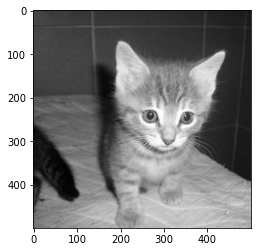

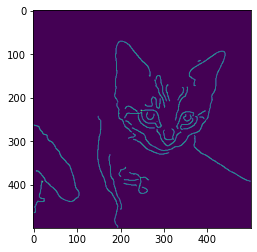

In [1]:
import matplotlib.pyplot as plt
import skimage.feature as sf
from skimage import io
from skimage.color import rgb2gray

image = rgb2gray(io.imread('./data/1.jpg'))
plt.imshow(image, cmap = 'gray')
plt.show()
canny = sf.canny(image, sigma = 3)
plt.imshow(canny)

In [2]:
# beginner version

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_canny(sigma):
    image = rgb2gray(io.imread('./data/1.jpg'))
    plt.imshow(image, cmap = 'gray')
    plt.show()
    canny = sf.canny(image, sigma = sigma)
    plt.imshow(canny)

    
interact(plot_canny,
         sigma = widgets.FloatText(value = 3.0,
                                    description = 'sigma = ',
                                    disabled = False))

interactive(children=(FloatText(value=3.0, description='sigma = '), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_canny(sigma)>

This function is connected with contrast: the detected edges are the result of a high change of gray value between two areas. A picture where the object is highly contrasted with the background will yield better results with the edge detection algorithm. to figure it out, compare in the following cell different pictures, by changing the name ``1.jpg`` with different integers in the range ``[1, 20]``. Change also the sigma value when it is needed to better gauge the edge detection result.

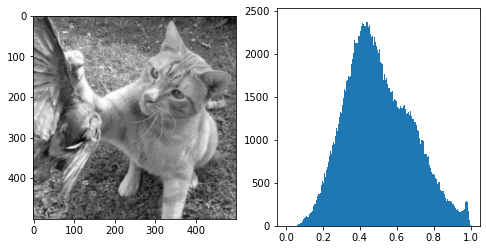

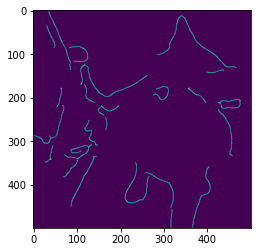

In [3]:
image = rgb2gray(io.imread('./data/5.jpg'))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.imshow(image, cmap = 'gray')
ax2.hist(image.flatten(), bins = 256, range = (0, 1))
plt.show()
canny = sf.canny(image, sigma = 5)
plt.imshow(canny)

In [4]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_general(image_nb, sigma):
    image = rgb2gray(io.imread('./data/' + str(image_nb) + '.jpg'))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
    ax1.imshow(image, cmap = 'gray')
    ax2.hist(image.flatten(), bins = 256, range = (0, 1))
    plt.show()
    canny = sf.canny(image, sigma = sigma)
    plt.imshow(canny)

    
interact(plot_general,
         image_nb = widgets.IntText(value = 1,
                                    description = 'Image:',
                                    disabled = False),
         sigma = widgets.FloatText(value = 3.0,
                                    description = 'sigma = ',
                                    disabled = False))

interactive(children=(IntText(value=1, description='Image:'), FloatText(value=3.0, description='sigma = '), Ou…

<function __main__.plot_general(image_nb, sigma)>

We notice that the pictures with a better edge detection work (where the animal is well detected) are also the ones with a better contrast.

## HOG from canny picture

We see that we can get an idea on how to gauge the quality of the image itself. But to be sure that it will enhance our personal model, we need to apply our method (HOG descriptors) to the generated image.

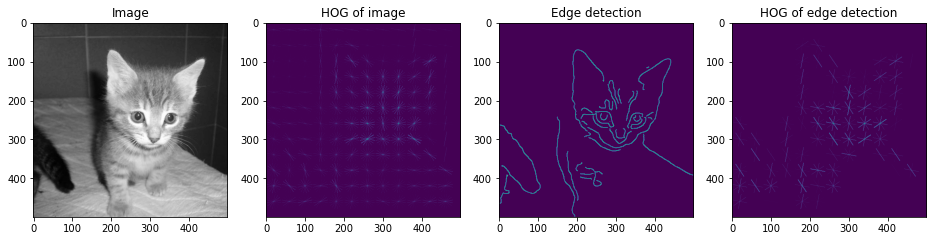

In [5]:
from skimage.exposure import rescale_intensity
from skimage.feature import hog

image = rgb2gray(io.imread('./data/1.jpg'))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (16, 4))

ax1.imshow(image, cmap = 'gray')
ax1.set_title('Image')

fd, hog_image = hog(image, orientations = 8, pixels_per_cell = (40, 40), visualize = True)
hog_image_rescaled = rescale_intensity(hog_image, in_range = (0, 10))
ax2.imshow(hog_image_rescaled)
ax2.set_title('HOG of image')

canny = sf.canny(image, sigma = 3)
ax3.imshow(canny)
ax3.set_title('Edge detection')

fd, hog_image = hog(canny.astype(int), orientations = 8, pixels_per_cell = (40, 40), visualize = True)
hog_image_rescaled = rescale_intensity(hog_image, in_range = (0, 10))
ax4.imshow(hog_image_rescaled)
ax4.set_title('HOG of edge detection')

plt.show()

From the previous graphs, we can see that the image of a cat is better recognizable from the HOG descriptors of the edge detected picture than from the original picture. We can now launch the classification task to see if it impacts the algorithm itself.

In [1]:
%run 2-functions.ipynb

import pandas as pd
from sklearn.metrics import accuracy_score

images = read_images('./2-images.csv')

images = images.assign(hog_features = create_hog(images['image']))
#x = ['hog_features', 'image']
#y = ['label']

In [2]:
%run 2-functions.ipynb

#x = ['hog_features', 'image']
pred, y_test, test = classify_images(images, 1)
print('Accuracy: ' + str(accuracy_score(pred, y_test)))
print_results(pred, y_test)

Accuracy: 0.5


AttributeError: 'Series' object has no attribute 'iterrows'

In [ ]:
images.head()

## Quiz